In [52]:
# Import Libraries

from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os
import unicodedata
import string
import random
import time
import math
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [53]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = "cpu"

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [56]:
#Change directories to point to your data!
data_path = '//content/drive/MyDrive/Copy of lm-data'
specfic_path = '//content/drive/MyDrive/Copy of lm-data.zip'
#!ls "$root_dir"
root_dir = "/content/data"
data_dir = root_dir + "/lm-data/names"


!unzip '//content/drive/MyDrive/Copy of lm-data.zip' -d "$root_dir"

Archive:  //content/drive/MyDrive/Copy of lm-data.zip
replace /content/data/lm-data/spa-eng.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/data/lm-data/spa-eng.zip  
replace /content/data/__MACOSX/lm-data/._spa-eng.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/data/__MACOSX/lm-data/._spa-eng.zip  
replace /content/data/__MACOSX/lm-data/._names? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/data/__MACOSX/lm-data/._names  
replace /content/data/lm-data/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/data/lm-data/.DS_Store  
replace /content/data/__MACOSX/lm-data/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/data/__MACOSX/lm-data/._.DS_Store  
replace /content/data/lm-data/eng-fra.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/data/lm-data/eng-fra.txt  
replace /content/data/__MACOSX/lm-data/._eng-fra.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /

In [57]:
# Vocabulary
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

print(n_letters)

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

57


In [58]:
def findFiles(path): 
  return glob.glob(path)

In [60]:
def findFiles(path): return glob.glob(path)

print(findFiles('data/names/*.txt'))

# Build the category_lines dictionary, a list of names per language
category_lines = {}
all_categories = []

# Read a file and split into lines
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

for filename in findFiles('data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)
print(n_categories) # Classes
# print(category_lines)

[]
0


In [61]:
# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

print(letterToTensor('J'))
print(lineToTensor('Jones').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])


In [64]:
# Convert text file into csv file

file_name = glob.glob(data_dir + '/*.txt')
file = open(file_name[0], encoding='utf-8')
CSVFile = pd.read_csv(file, delimiter='\t', header=None)
print('Shape of File: ',CSVFile.shape)
print(CSVFile.head(3))

NameError: ignored

In [40]:
#Change directories to point to your data!
data_path = '///content/drive/MyDrive/archive (9)'
specfic_path = '///content/drive/MyDrive/archive (9).zip'
#!ls "$root_dir"
root_dir = "/content/data"
data_dir = root_dir + "/archive (9)/names"


!unzip '///content/drive/MyDrive/archive (9)' -d "$root_dir"

Archive:  ///content/drive/MyDrive/archive (9).zip
  inflating: /content/data/Video Games Dataset.csv  


In [5]:
# Vocabulary
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

print(n_letters)

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

57
Slusarski


In [6]:
def findFiles(path): 
  return glob.glob(path)

In [34]:
 # pip install datasets

In [36]:
from datasets import load_dataset 

ModuleNotFoundError: ignored

In [ ]:
# Convert text file into csv file

file_name = glob.glob(data_dir + '/*.txt')
file = open(file_name[0], encoding='utf-8')
CSVFile = pd.read_csv(file, delimiter='\t', header=None)
print('Shape of File: ',CSVFile.shape)
print(CSVFile.head(3))

In [29]:
!pip install hugging faces

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement hugging (from versions: none)
ERROR: No matching distribution found for hugging


In [19]:
from datasets import load_dataset
dataset_news = load_dataset('ag_news')

print(dataset_news

SyntaxError: ignored

In [16]:
data_images_path = 'data/images/'
data_datasets_path = 'data/datasets/'
  

In [ ]:
pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 365 kB 4.3 MB/s 
     |████████████████████████████████| 141 kB 55.4 MB/s 
     |████████████████████████████████| 115 kB 53.7 MB/s 
     |████████████████████████████████| 101 kB 12.0 MB/s 
     |████████████████████████████████| 212 kB 56.7 MB/s 
     |████████████████████████████████| 596 kB 39.9 MB/s 
     |████████████████████████████████| 127 kB 61.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [45]:
data_images_path = 'data/images/'
data_datasets_path = 'data/datasets/'

In [48]:
!pip install huggingFace

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
dataset_news = load_dataset('selfit_news')

print(dataset_news

SyntaxError: ignored

In [65]:
labels = {
    0: 'rec.autos',
    1: 'comp.sys.mac.hardware',
    2: 'comp.graphics',
    3: 'sci.space',
    4: 'talk.politics.guns',
    5: 'sci.med',
    6: 'comp.sys.ibm.pc.hardware',
    7: 'comp.os.ms-windows.misc',
    8: 'rec.motorcycles',
    9: 'talk.religion.misc',
    10: 'misc.forsale',
    11: 'alt.atheism',
    12: 'sci.electronics',
    13: 'comp.windows.x',
    14: 'rec.sport.hockey',
    15: 'rec.sport.baseball', 
    16: 'soc.religion.christian',
    17: 'talk.politics.mideast', 
    18: 'talk.politics.misc', 
    19: 'sci.crypt',
      
}

n_labels = 19

def index_to_label(idx):
    return labels[idx]


print('\033[1m{}\033[0m \n{}\n'.format(index_to_label(dataset_setfit['train']['label'][600]), dataset_setfit['train']['text'][600]))
print('\033[1m{}\033[0m \n{}\n'.format(index_to_label(dataset_setfit['train']['label'][500]), dataset_setfit['train']['text'][500]))
print('\033[1m{}\033[0m \n{}\n'.format(index_to_label(dataset_setfit['train']['label'][0]), dataset_setfit['train']['text'][0]))
print('\033[1m{}\033[0m \n{}\n'.format(index_to_label(dataset_setfit['train']['label'][100]), dataset_setfit['train']['text'][100]))

print('\033[1m{}\033[0m \n{}\n'.format(index_to_label(dataset_setfit['train']['label'][600]), dataset_setfit['train']['text'][600]))
print('\033[1m{}\033[0m \n{}\n'.format(index_to_label(dataset_setfit['train']['label'][500]), dataset_setfit['train']['text'][500]))
print('\033[1m{}\033[0m \n{}\n'.format(index_to_label(dataset_setfit['train']['label'][0]), dataset_setfit['train']['text'][0]))
print('\033[1m{}\033[0m \n{}\n'.format(index_to_label(dataset_setfit['train']['label'][100]), dataset_setfit['train']['text'][100]))

print('\033[1m{}\033[0m \n{}\n'.format(index_to_label(dataset_setfit['train']['label'][600]), dataset_setfit['train']['text'][600]))
print('\033[1m{}\033[0m \n{}\n'.format(index_to_label(dataset_setfit['train']['label'][500]), dataset_setfit['train']['text'][500]))
print('\033[1m{}\033[0m \n{}\n'.format(index_to_label(dataset_setfit['train']['label'][0]), dataset_setfit['train']['text'][0]))
print('\033[1m{}\033[0m \n{}\n'.format(index_to_label(dataset_setfit['train']['label'][100]), dataset_setfit['train']['text'][100]))

print('\033[1m{}\033[0m \n{}\n'.format(index_to_label(dataset_setfit['train']['label'][600]), dataset_setfit['train']['text'][600]))
print('\033[1m{}\033[0m \n{}\n'.format(index_to_label(dataset_setfit['train']['label'][500]), dataset_setfit['train']['text'][500]))
print('\033[1m{}\033[0m \n{}\n'.format(index_to_label(dataset_setfit['train']['label'][0]), dataset_setfit['train']['text'][0]))
print('\033[1m{}\033[0m \n{}\n'.format(index_to_label(dataset_setfit['train']['label'][600]), dataset_setfit['train']['text'][600]))
print('\033[1m{}\033[0m \n{}\n'.format(index_to_label(dataset_setfit['train']['label'][500]), dataset_setfit['train']['text'][500]))
print('\033[1m{}\033[0m \n{}\n'.format(index_to_label(dataset_setfit['train']['label'][0]), dataset_setfit['train']['text'][0]))
print('\033[1m{}\033[0m \n{}\n'.format(index_to_label(dataset_setfit['train']['label'][100]), dataset_setfit['train']['text'][100]))

NameError: ignored

In [ ]:
contractions = {
"i ve" : ["i", "have"],
"couldn't" : ["could", "not"],
"didn't" : ["did", "not"],
"doesn't" : ["does", "not"],
"don't" : ["do", "not"],
"hadn't" : ["had", "not"],
"hasn't" : ["has", "not"],
"he'd" : ["he", "would"],
"i'll" : ["i", "will"],
"he's" : ["he", "is"],
"i'd" : ["i", "would"],
"i'd" : ["i", "had"],
"i'll" : ["i", "will"],
"i'm" : ["i", "am"],
"isn't" : ["is", "not"],
"it's" : ["it", "is"],
"it'll" : ["it", "will"],
"i've" : ["i", "have"],
"let's" : ["let", "us"],
"mightn't" : ["might", "not"],
"mustn't" : ["must", "not"],
"sha" : ["shall"],
"she'd" : ["she", "would"],
"she'll" : ["she", "will"],
"she's" : ["she", "is"],
"shouldn't" : ["should", "not"],
"that's" : ["that", "is"],
"there's" : ["there", "is"],
"they'd" : ["they", "would"],
"they'll" : ["they", "will"],
"they're" : ["they", "are"],
"they've" : ["they", "have"],
"we'd" : ["we", "would"],
"we're" : ["we", "are"],
"weren't" : ["were", "not"],
"we've" : ["we", "have"],
"what'll" : ["what", "will"],
"what're" : ["what", "are"],
"what's" : ["what", "is"],
"what've" : ["what", "have"],
"where's" : ["where", "is"],
"who'd" : ["who", "would"],
"who'll" : ["who", "will"],
"who're" : ["who", "are"],
"who's" : ["who", "is"],
"who've" : ["who", "have"],
"wouldn't" : ["would", "not"],
"you'd" : ["you", "would"],
"you'll" : ["you", "will"],
"you're" : ["you", "are"],
"you've" : ["you", "have"],
"'re":  ["are"],
"wasn't": ["was", "not"],
"we'll": ["we", "will"],
"didn't": ["did", "not"],
}

In [ ]:
import re
regex = "[\w']+"

test1 = "didn't wasn't you've we'll' wouldn't who's"
test2 = "you've' you what'll they've for food "
test3 = "i'll come to you'd'"

def tokenize(sentence):
    tokens = []
    for w in re.findall(regex, sentence):
        w_lower = str.lower(w)
        if (w_lower in contractions):
            tokens.extend(contractions[w_lower])
        else:
            tokens.append(w_lower)

    return tokens

print(tokenize(test1))
print(tokenize(test2))
print(tokenize(test3))

['did', 'not', 'was', 'not', 'you', 'have', "we'll'", 'would', 'not', 'who', 'is']
["you've'", 'you', 'what', 'will', 'they', 'have', 'for', 'food']
['i', 'will', 'come', 'to', "you'd'"]


In [ ]:
from collections import Counter
import numpy as np

In [ ]:
all_words = []
all_news = []

for sentence in dataset_news['train']['text']:
    tokens = tokenize(sentence)
    all_words.extend(tokens)
    all_news.append(tokens)


print(all_words[:50])
print('\ntotal number of words:', len(all_words))

unique_words = Counter(all_words)
print('\033[4m{: <18} {: >18}\033[0m'.format('word', '#occurrences'))
for i, key in enumerate(unique_words):
    if i == 5:
        break
    print('{: <18} {: >18}'.format(key, unique_words[key]))
print('\ntotal number of unique words: ', len(unique_words), '\n')



news = []
for i in range(n_labels):
    news.append(np.array(all_news, dtype=object)[np.array(dataset_news['train']['label']) == i])

# print('\033[4m{: <18} {: >18}\033[0m'.format('label', '#news articles'))
# for i in range(n_labels):
#     print('{: <18} {: >18}'.format(index_to_label(i), len(news[i])))


category_counts = []
for i in range(n_labels):
    category_words = []
    for j in range(len(news[i])):
        category_words.extend(news[i][j])

    category_count = Counter(category_words)

    tmp = []
    for j, w in enumerate(unique_words):
        if (w in category_count):
            tmp.append(category_count[w])
        else:
            tmp.append(0)
    category_counts.append(tmp)


counts = [0]*19
tmp = []
unique_threshold = 0.9
count_threshold = 18

print('extracting keywords...')
print(f'removing all words appearing less than {count_threshold} times...\n')


print('\033[4m{: <20} {: <18} {: <18} {: <18} {: <18}\033[0m'.format('word', 'rec.autos', 'comp.sys.mac.hardware', 'comp.graphics', 'sci.space', 'talk.politics.guns', 'sci.med', 'comp.sys.ibm.pc.hardware', 'comp.os.ms-windows.misc', 'rec.motorcycles',
     'talk.religion.misc', 'misc.forsale', 'alt.atheism', 'sci.electronics', 'comp.windows.x', 'rec.sport.hockey', 'rec.sport.baseball', 'soc.religion.christian','talk.politics.mideast', 'talk.politics.misc', 'sci.crypt',))
for i, w in enumerate(unique_words):
    total_count = category_counts[0][i] + category_counts[1][i] + category_counts[2][i] + category_counts[3][i] + category_counts[4][i] + category_counts[5][i] + category_counts[6][i]

    if total_count < count_threshold:
        continue

    print('{: <20} {: <18} {: <18} {: <18} {: <18}'.format(w, f'{category_counts[0][i] / total_count:.2f}', f'{category_counts[1][i] / total_count:.2f}', f'{category_counts[2][i] / total_count:.2f}', f'{category_counts[3][i] / total_count:.2f}'))

    for j in range(n_labels):
        ratio = category_counts[j][i] / total_count
        if (ratio >= unique_threshold):
            tmp.append(w)
            continue

print('\n{: <20} {: <15} {: <15} {: <15} {: <15}'.format('category:', 'rec.autos','comp.sys.mac.hardware','comp.graphics','sci.space' 'talk.politics.guns',
    'sci.med', 'comp.sys.ibm.pc.hardware', 'comp.os.ms-windows.misc', 'rec.motorcycles', 'talk.religion.misc', 'misc.forsale', 'alt.atheism', 'sci.electronics', 'comp.windows.x', 'rec.sport.hockey', 'rec.sport.baseball', 'soc.religion.christian',
    'talk.politics.mideast',  'talk.politics.misc', 'sci.crypt',))
print('{: <20} {: <15} {: <15} {: <15} {: <15}'.format('#keywords:', counts[0], counts[1], counts[2], counts[3]))
print('total number of unique words: ', len(tmp), '\n')


unique_words = tmp
n_unique_words = len(unique_words)


['i', 'was', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten', 'me', 'on', 'this', 'car', 'i', 'saw', 'the', 'other', 'day', 'it', 'was', 'a', '2', 'door', 'sports', 'car', 'looked', 'to', 'be', 'from', 'the', 'late', '60s', 'early', '70s', 'it', 'was', 'called', 'a', 'bricklin', 'the', 'doors', 'were', 'really', 'small', 'in', 'addition', 'the', 'front', 'bumper', 'was']

total number of words: 2402026
word                     #occurrences
i                               36302
was                              9873
wondering                         187
if                               9589
anyone                           1611

total number of unique words:  108219 

extracting keywords...
removing all words appearing less than 18 times...

word                 rec.autos          comp.sys.mac.hardware comp.graphics      sci.space         
i                    0.11               0.11               0.25               0.16              
was                  0.31          

In [ ]:
import torch

In [ ]:
def word_to_index(word):
    if word in unique_words:
        return unique_words.index(word)
    else:
        return -1

def sentence_vector_to_tensor(tokens):
    tensor = torch.zeros(len(tokens), 1, n_unique_words)
    for i, word in enumerate(tokens):
        idx = word_to_index(word)
        if idx != -1:
            tensor[i][0][idx] = 1  
    return tensor

def sentence_to_tensor(sentence):
    tokens = tokenize(sentence)
    return sentence_vector_to_tensor(tokens)


print('index:', word_to_index('car'))
print('tensor:', sentence_to_tensor('car'), '\n')

print(sentence_to_tensor('i was wondering if out there could enlighten me').size())

index: 1
tensor: tensor([[[0., 1., 0.,  ..., 0., 0., 0.]]]) 

torch.Size([9, 1, 1972])


In [ ]:
import torch.nn as nn

In [ ]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.hidden_comp = nn.Linear(input_size + hidden_size, hidden_size)
        self.output_comp = nn.Linear(input_size + hidden_size, hidden_size)
        self.output2output = nn.Linear(hidden_size, output_size)
        self.tanh_act = nn.Tanh()
        self.lsoftmax = nn.LogSoftmax(dim=1)


    def forward(self, x, hidden):
        # print(x.shape)
        # print(hidden.shape)
        
        combined = torch.cat((x, hidden), 1)
        hidden = self.hidden_comp(combined)
        hidden = self.tanh_act(hidden)
        # print(hidden.shape)

        output = self.output_comp(combined)
        output = self.tanh_act(output)
        # print(output.shape)
        output = self.output2output(output)
        output = self.lsoftmax(output)
        # print(output.shape)    
        return output, hidden


    def initHidden(self):
        return torch.zeros(1, self.hidden_size)


n_hidden = 128
model_rnn = RNN(n_unique_words, n_hidden, n_labels)

In [ ]:
x = sentence_to_tensor('car')
hidden = model_rnn.initHidden()

output, next_hidden = model_rnn(x[0], hidden)
print(output.argmax(-1))
print(output.topk(4).indices, '\n')

tensor([4])
tensor([[ 4,  3, 11, 16]]) 



In [ ]:
def output_to_label_index(output):
    return output.argmax(-1).item()

print(output_to_label_index(output))

4


In [ ]:
import random

In [ ]:
def random_label_index():
    return random.randint(0, n_labels-1)

def random_news(label_index):
    return news[label_index][random.randint(0, len(news[label_index])-1)]

def random_news_sample():
    label_index = random_label_index()
    news_text = random_news(label_index)
    label_tensor = torch.tensor(label_index, dtype=torch.long)
    news_tensor = sentence_vector_to_tensor(news_text)
    return label_index, news_text, label_tensor, news_tensor


for i in range(1):
    label_index, news_text, label_tensor, news_tensor = random_news_sample()
    print(f'\033[1m{index_to_label(label_index)}\033[0m\n{news_text}\n')

alt.atheism
['a', 'typical', 'example', 'of', 'seep', 'minded', 'thinking', 'we', 'all', 'know', 'that', 'david', 'sternlight', 'is', 'a', 'jerk', 'but', 'i', 'am', 'afraid', 'that', 'in', 'this', 'case', '90', 'of', 'the', 'population', 'will', 'think', 'like', 'him', 'realize', 'it', 'guys', 'nsa', 'dorothy', 'denning', 'and', 'the', 'us', 'government', 'have', 'already', 'won', 'the', 'battle', 'unless', 'unless', 'you', 'succeed', 'to', 'wake', 'up', 'the', 'people', 'but', 'nah', 'that', 'is', 'too', 'unlikely', 'the', 'events', 'are', 'happening', 'too', 'fast', 'cryptography', 'is', 'a', 'too', 'sophisticated', 'issue', 'and', 'almost', 'nobody', 'cares', 'anyway', 'a', 'few', 'thousand', 'of', 'net', 'readers', "won't", 'make', 'the', 'difference', 'if', 'millions', 'are', 'caught', 'asleep', 'too', 'sad', 'regards', 'vesselin']



In [ ]:
def train(label_tensor, news_tensor, optim, criterion, model):
    label_tensor, news_tensor = label_tensor.to(device), news_tensor.to(device)
    
    model.train()
    hidden = model.initHidden()
    model.zero_grad()

    # Iterate through the whole sentence!
    for i in range(news_tensor.size()[0]):
        hidden = hidden.to(device)
        output, hidden = model(news_tensor[i], hidden)

    label_tensor = label_tensor.unsqueeze(dim=0)
    loss = criterion(output, label_tensor)
    
    optim.zero_grad()
    loss.backward()
    optim.step()

    return output, loss.item()

In [ ]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print('running on:', device)

running on: cpu


In [ ]:
import torch.nn as nn

In [ ]:
import torch.optim as optim

In [ ]:
criterion = nn.NLLLoss()
learning_rate = 0.005

n_hidden = 128
model_rnn = RNN(n_unique_words, n_hidden, n_labels)
model_rnn = model_rnn.to(device)

optimizer = optim.SGD(model_rnn.parameters(), lr=learning_rate)

n_iters = 10000
print_every = n_iters/5000
plot_every = n_iters/10

total_loss = 0
current_loss = 0
all_losses_rnn = []

for iter in range(0, n_iters + 1):
    label_index, news_text, label_tensor, news_tensor = random_news_sample()
    total_loss += loss
    current_loss += loss
   
    
    

    if iter % print_every == 0:
        label_index_pred = output_to_label_index(output)
        correct = '✔️' if label_index_pred == label_index else '❌'  
        
        print(f'iteration: {iter} ({iter*100/n_iters:.1f}%)  |  loss: {loss:.4f}  |  avg. loss: {avg_loss:.4f}  |  guess: {index_to_label(label_index_pred)}, actual: {index_to_label(label_index)}  {correct}')
        
    
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

Streaming output truncated to the last 5000 lines.
iteration: 2 (0.0%)  |  loss: 2.9253  |  avg. loss: 2.9355  |  guess: rec.autos, actual: rec.autos  ✔️
iteration: 4 (0.0%)  |  loss: 2.9253  |  avg. loss: 2.9355  |  guess: rec.autos, actual: rec.sport.hockey  ❌
iteration: 6 (0.1%)  |  loss: 2.9253  |  avg. loss: 2.9355  |  guess: rec.autos, actual: rec.motorcycles  ❌
iteration: 8 (0.1%)  |  loss: 2.9253  |  avg. loss: 2.9355  |  guess: rec.autos, actual: rec.autos  ✔️
iteration: 10 (0.1%)  |  loss: 2.9253  |  avg. loss: 2.9355  |  guess: rec.autos, actual: rec.autos  ✔️
iteration: 12 (0.1%)  |  loss: 2.9253  |  avg. loss: 2.9355  |  guess: rec.autos, actual: rec.sport.baseball  ❌
iteration: 14 (0.1%)  |  loss: 2.9253  |  avg. loss: 2.9355  |  guess: rec.autos, actual: sci.space  ❌
iteration: 16 (0.2%)  |  loss: 2.9253  |  avg. loss: 2.9355  |  guess: rec.autos, actual: talk.politics.guns  ❌
iteration: 18 (0.2%)  |  loss: 2.9253  |  avg. loss: 2.9355  |  guess: rec.autos, actual: rec.s

In [ ]:
import torch.optim as optim

In [ ]:
import matplotlib.pyplot as plt

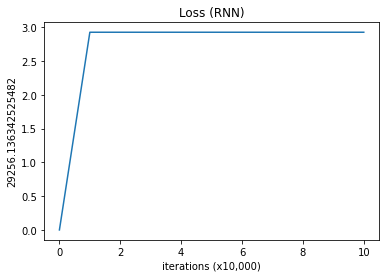

In [ ]:
plt.figure()
plt.plot(all_losses_rnn); plt.title('Loss (RNN)'); plt.xlabel('iterations (x10,000)'); plt.ylabel(total_loss)
plt.savefig('news_loss_rnn')
plt.show()

In [ ]:
def evaluate(news_tensor, model):
    model.eval()
    hidden = model.initHidden()
    news_tensor = news_tensor.to(device)

    for i in range(news_tensor.size()[0]):
        hidden = hidden.to(device)
        output, hidden = model(news_tensor[i], hidden)

    return output

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

In [ ]:
n_confusion = 10000

labels_actual = [None]*n_confusion
labels_pred = [None]*n_confusion


for i in range(n_confusion):
    label_index, news_text, label_tensor, news_tensor = random_news_sample()

   
    label_index_pred = output_to_label_index(output)

    labels_actual[i] = label_index
    labels_pred[i] = label_index_pred


plt.figure(figsize = (11, 8))

counts = np.array([(np.array(labels_actual) == i).sum() for i in range(n_labels)]).reshape(-1, 0)
cf_matrix_norm = cf_matrix / counts
cf_matrix = confusion_matrix(labels_actual, labels_pred)


df_cm = pd.DataFrame(cf_matrix_norm, index = [index_to_label(i) for i in range(n_labels)], columns = [index_to_label(i) for i in range(n_labels)])
s = sns.heatmap(df_cm, annot=True, cmap=sns.color_palette("rocket", as_cmap=True), vmin=0, vmax=1)
s.set(xlabel='Predicted category', ylabel='Actual category')
plt.title(f'Confusion matrix - News (RNN)')

plt.savefig('news_confusion_matrix_1.png')

ValueError: ignored

<Figure size 792x576 with 0 Axes>